In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['axes.spines.top']=False
rcParams['axes.spines.right']=False


In [2]:
trdata=pd.read_csv("train.csv")

In [3]:
tesdata=pd.read_csv("test.csv")

In [4]:
testdex = tesdata.index

target_names = ["Sincere","Insincere"]
y = trdata['target'].copy()

In [5]:
trdata.shape

(1306122, 3)

In [6]:
tesdata.shape

(375806, 2)

In [7]:
trdata.head(n=10)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0


In [7]:
trdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [4]:
t=trdata["target"]

In [6]:
sincere=len(trdata.question_text[trdata["target"]==0])/len(trdata["question_text"])*100
print(sincere)

93.81298224821265


In [7]:
insincere=len(trdata.question_text[trdata["target"]==1])/len(trdata["question_text"])*100
print(insincere)

6.187017751787352


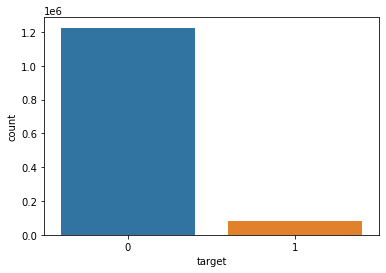

In [5]:
sns.countplot(t)

data pre-processing

In [8]:
import re
# find sentences containing HTML tags
i=0;
for sentence in trdata['question_text'].values:
    if (len(re.findall('<.*?>', sentence))):
        print(i)
        #print(sentence)
        break;
    i += 1;

8062


In [9]:
import re
import string
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


In [10]:
def cleanhtml(sentence): #clean any html-tags
    cleanr = re.compile('<.*?>') #pattern matching
    cleantext = re.sub(cleanr, ' ', sentence) #replacing '<.*?>' with space
    return cleantext

In [11]:
def cleanpunc(sentence): #clean any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [12]:
stop = set(stopwords.words('english')) #list of stopwords, comes in package NLTK
a=set(["not","below","did","didn","didn't","does","doesn't","don't"]) #these words can be considered as part of insincere words
stop=stop.difference(a) 
sno = nltk.stem.SnowballStemmer('english') #english stemmer


In [13]:
i=0
str1=' '
final_string=[]
all_sincere_words=[] # store words from sincere reviews here
all_unsincere_words=[] # store words from unsincere reviews here.
s=''
for sentence in trdata['question_text'].values: #each sentence in question_test column
    filtered_sentence=[]
    sentence=cleanhtml(sentence) # remove HTMl tags
    for w in sentence.split(): #each word in those sentences
        for cleaned_words in cleanpunc(w).split(): #words with no punctuations
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8') #stemming
                    filtered_sentence.append(s)
                    if (trdata['target'].values)[i] == '0': 
                        all_sincere_words.append(s) #list of all words used to describe sincere reviews
                    if(trdata['target'].values)[i] == '1':
                        all_unsincere_words.append(s) #list of all words used to describe unsincere reviews 
                else:
                    continue
            else:
                continue 
    str1 = b" ".join(filtered_sentence) #final string of cleaned words(bytes)
    final_string.append(str1)
    i+=1

In [14]:
trdata['preprocessedtext']=final_string

In [15]:
trdata.head(10)

,qid,question_text,target,preprocessedtext
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,b'did quebec nationalist see provinc nation'
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,b'adopt dog would encourag peopl adopt not shop'
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,b'doe veloc affect time doe veloc affect space...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,b'did otto von guerick use magdeburg hemispher'
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,b'convert montra helicon mountain bike chang t...
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0,b'gaza slowli becom auschwitz dachau treblinka...
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0,b'doe quora automat ban conserv opinion report...
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0,b'crazi wash wipe groceri germ everywher'
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0,b'thing dress moder differ dress modest'
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0,b'ever phase wherein becam ignor peopl love co...


In [16]:
sincere=trdata[trdata['target']==0]
insincere=trdata[trdata['target']==1]

Word Cloud

In [7]:
from wordcloud import WordCloud

insincere data word cloud

In [20]:
wordcloud = WordCloud( width=600, height=400).generate(" ".join(trdata.preprocessedtext[trdata['target']==1].astype(str)))

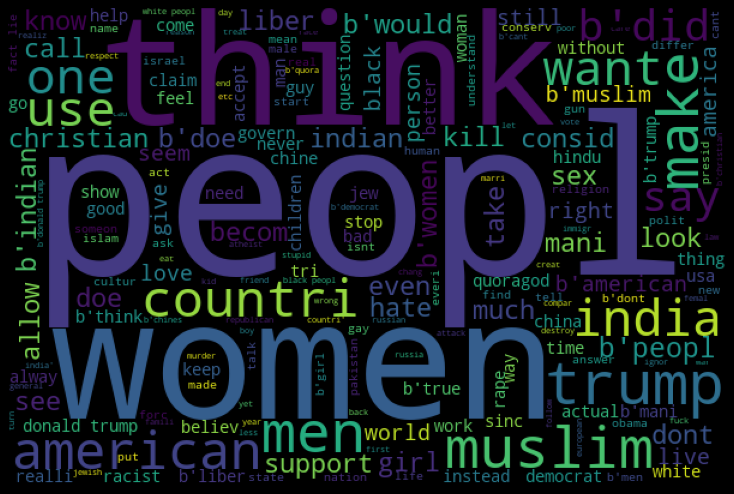

In [21]:
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [22]:
mostfreq=trdata.preprocessedtext[trdata['target']==1].astype('str').str.split(expand=True).stack().value_counts()

In [23]:
mostfreq[:10]

peopl     9279
not       6369
like      5900
trump     4887
women     4087
b'doe     3875
muslim    3526
get       3484
indian    3202
think     3116
dtype: int64

sincere data word cloud

In [24]:
wordcloud = WordCloud( width=600, height=400).generate(" ".join(trdata.preprocessedtext[trdata['target']==0].astype(str)))

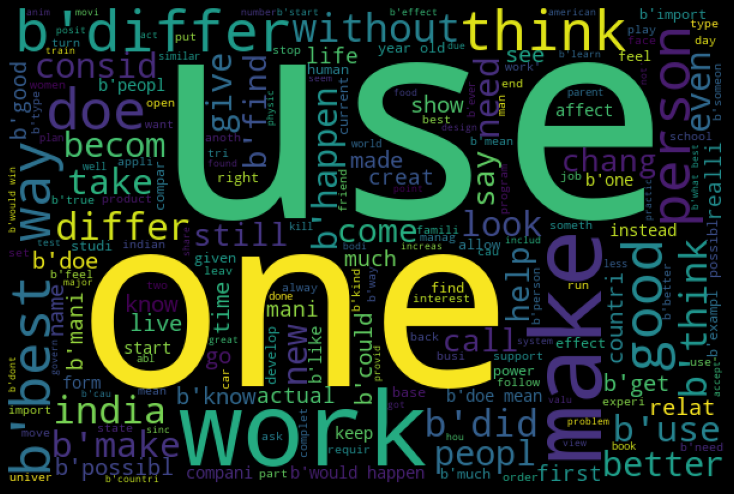

In [25]:
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [27]:
mostfreq=trdata.preprocessedtext[trdata['target']==0].astype('str').str.split(expand=True).stack().value_counts()
mostfreq[:10]

b'doe      57546
get        46030
b'best     45387
like       35449
use        35073
not        34906
b'would    27867
would      27504
peopl      26632
b'did      25690
dtype: int64

In [28]:
sincere_lst_len = [len(trdata['question_text'][i]) for i in range(0, len(trdata['question_text'][trdata['target'] == 0])) if trdata['target'][i] == 0]
sincere_len_mean = np.array(sincere_lst_len).mean()
print("Mean of sincere questions: {:.0f} characters".format(sincere_len_mean))

Mean of sincere questions: 69 characters


In [29]:
unsincere_lst_len = [len(trdata['question_text'][i]) for i in range(0, len(trdata['question_text'][trdata['target'] == 1])) if trdata['target'][i] == 1]
unsincere_len_mean = np.array(unsincere_lst_len).mean()
print("Mean of unsincere questions: {:.0f} characters".format(unsincere_len_mean))

Mean of unsincere questions: 98 characters


In [8]:
import warnings
warnings.filterwarnings("ignore")

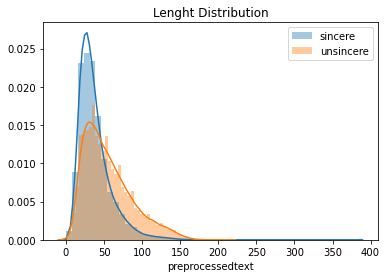

In [31]:
s1 = trdata[trdata['target'] == 0]['preprocessedtext'].str.len()
sns.distplot(s1, label='sincere')
s2 = trdata[trdata['target'] == 1]['preprocessedtext'].str.len()
sns.distplot(s2, label='unsincere')
plt.title('Lenght Distribution')
plt.legend()

Modelling

In [17]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn import preprocessing

import lightgbm as lgb

# Tf-Idf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

np.random.seed(2018)

from contextlib import contextmanager
import gc

In [18]:
import time
notebookstart= time.time()

@contextmanager
def timer(name):   #for recording the no. of seconds our code is taking
    t0 = time.time()
    yield
    print(f'[{name}] done in {time.time() - t0:.0f} s')

In [19]:
tesdata['target'] = np.nan
all_text = pd.concat([trdata['question_text'],tesdata['question_text']], axis =0)
#vectorization
word_vect = TfidfVectorizer(
            sublinear_tf=True,
            strip_accents='unicode',
            analyzer='word',
            token_pattern=r'\w{1,}',
            stop_words='english',
            ngram_range=(1, 2),
            max_features=70000)

with timer("Word Grams TFIDF"):
    word_vect.fit(all_text)
    X  = word_vect.transform(trdata['question_text'])
    testing  = word_vect.transform(tesdata['question_text'])

[Word Grams TFIDF] done in 183 s


In [20]:
# Train Test Split
X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=0.20, random_state=23, stratify=y)

In [53]:
# Fit Model
model = LogisticRegression(solver = 'sag') #stochastic average gradient
model.fit(X_train, y_train)

# Prediction
valid_logistic_pred = model.predict(X_valid)
train_logistic_pred = model.predict(X_train)
valid_logistic_pred_proba = model.predict_proba(X_valid)
valid_logistic_pred_proba = [x[1] for x in valid_logistic_pred_proba]

In [55]:
print("Train Set Accuracy: {}".format(metrics.accuracy_score(train_logistic_pred, y_train)))
print("Train Set ROC: {}".format(metrics.roc_auc_score(train_logistic_pred, y_train)))
print("Train Set F1 Score: {}\n".format(metrics.f1_score(train_logistic_pred, y_train)))

print("Validation Set Accuracy: {}".format(metrics.accuracy_score(valid_logistic_pred, y_valid)))
print("Validation Set ROC: {}".format(metrics.roc_auc_score(valid_logistic_pred, y_valid)))
print("Validation Set F1 Score: {}\n".format(metrics.f1_score(valid_logistic_pred, y_valid)))

print(metrics.classification_report(valid_logistic_pred, y_valid))



Train Set Accuracy: 0.9549467555175295
Train Set ROC: 0.8515291233002446
Train Set F1 Score: 0.5348497124676402

Validation Set Accuracy: 0.9521982964877022
Validation Set ROC: 0.8349976964043646
Validation Set F1 Score: 0.49929828782228636

              precision    recall  f1-score   support

           0       0.99      0.96      0.97    252448
           1       0.39      0.71      0.50      8777

    accuracy                           0.95    261225
   macro avg       0.69      0.83      0.74    261225
weighted avg       0.97      0.95      0.96    261225



Light GBM model

In [22]:
feature_names = word_vect.get_feature_names()

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.20, random_state=23, stratify=y)

In [24]:
max_boosting_rounds=6500
print("Light Gradient Boosting Classifier: ")
lgbm_params = {
        "objective": "binary",
        'metric': {'auc'},
        "boosting_type": "gbdt",
        "num_threads": 4,
        "bagging_fraction": 0.8,
        "feature_fraction": 0.8,
        "learning_rate": 0.1,
        "num_leaves": 31,
        "min_split_gain": .1,
        "reg_alpha": .1
    }

modelstart= time.time()
# LGBM Dataset Formatting 
lgtrain = lgb.Dataset(X_train, y_train,
                feature_name=feature_names)
lgvalid = lgb.Dataset(X_valid, y_valid,
                feature_name=feature_names)

lgb_clf = lgb.train(
    lgbm_params,
    lgtrain,
    num_boost_round= max_boosting_rounds,
    valid_sets=[lgtrain, lgvalid],
    valid_names=['train','valid'],
    early_stopping_rounds=150,
    verbose_eval=500
)

del lgtrain, lgvalid ;  gc.collect();

Light Gradient Boosting Classifier: 
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 64648, number of negative: 980249
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 294.922281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 473325
[LightGBM] [Info] Number of data points in the train set: 1044897, number of used features: 52350
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061870 -> initscore=-2.718849
[LightGBM] [Info] Start training from score -2.718849
Training until validation scores don't improve for 150 rounds
[500]	train's auc: 0.951942	valid's auc: 0.943426
[1000]	train's auc: 0.96179	valid's auc: 0.947064
[1500]	train's auc: 0.967744	valid's auc: 0.948313
[2000]	train's auc:

In [25]:

Y_target = []
valid_pred = lgb_clf.predict(X_valid)
test_pred = lgb_clf.predict(testing)
Y_target.append(np.log1p(test_pred))


In [26]:
_thresh = []
for thresh in np.arange(0.1, 0.501, 0.01):
    _thresh.append([thresh, metrics.f1_score(y_valid, (valid_pred>thresh).astype(int))])

_thresh = np.array(_thresh)
best_id = _thresh[:,1].argmax()
best_thresh = _thresh[best_id][0]
print("Best Threshold: {}\nF1 Score: {}".format(best_thresh, _thresh[best_id][1]))

Best Threshold: 0.21999999999999995
F1 Score: 0.6131786339754816
